In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime
from datetime import timedelta
from matplotlib import colors as mcolors
import matplotlib.dates as mdates
from model_utils import *
##########################################################################################
### Notebook para graficar los índices Kp, Dst y F10.7 de datos de OMNIWeb
### Necesita una estructura de directorios pre-existente:
### ./geomagnetic_indices/
### Cada archivo debe tener 6 columnas con el siguiente encabezado:
### Year DayOfYear Hour Kp Dst F107
##########################################################################################

In [12]:
dir_path = "geomagnetic_indices"
year = 2023
month = 11
filename = "hourly-geomagnetic-indices-%02d-%d.txt" % (month, year)
filename = './' + dir_path + '/' + filename
str_month = GetMonth(month)
current_month = '%s-%d' % (str_month, year) 
#####################################################################
##### Introducir la ruta donde se guardarán los gráficos:
#####################################################################
plots_boletin = '/home/jp/Desktop-ROJ/Plots-Boletines/%02d/%s' % (year,str_month)
dir_plots = plots_boletin

In [13]:
def GetIndices(Data):
    YYYY = Data['Year']
    DD = Data['DayOfYear']
    hh = Data['Hour']
    fechas = []
    for Y, D, h in zip(YYYY, DD, hh):
        str_temp = '%d-%02d' % (Y,D) 
        fecha = datetime.datetime.strptime(str_temp,'%Y-%j')
        M = fecha.month
        D = fecha.day
        fecha = datetime.datetime(Y, M, D, h, 0, 0)
        fechas.append(fecha)
    dates = pd.to_datetime(fechas)

    return dates

In [14]:
Data = pd.read_csv(filename,delimiter=r"\s+")#
indices = GetIndices(Data)
Data.set_index(indices, inplace=True)

In [15]:
print(Data['Kp'].shape)
print(Data['F107'].shape)

(720,)
(720,)


In [16]:
kp_series = pd.Series(Data['Kp'].values, index=indices)
F107_series = pd.Series(Data['F107'].values, index=indices)
Dst_series = pd.Series(Data['Dst'].values, index=indices)
dst_lim_low = np.ones(Data['Kp'].shape)*(-50)
dst_lim_0 = np.ones(Data['Kp'].shape)*(0)
dst_lim0 = pd.Series(dst_lim_0, index=indices)
dst_lim = pd.Series(dst_lim_low, index=indices)
moderate_lim = np.ones(Data['Kp'].shape)*100
mod_lim_kp = np.ones(Data['Kp'].shape)*5
kp_moderate = pd.Series(mod_lim_kp, index=indices)
F107_moderate = pd.Series(moderate_lim, index=indices)
high_lim = np.ones(Data['Kp'].shape)*150
F107_high = pd.Series(high_lim, index=indices)

In [17]:
F107_filtered = F107_series[F107_series<999.9]

### Graficando Kp vs Dst

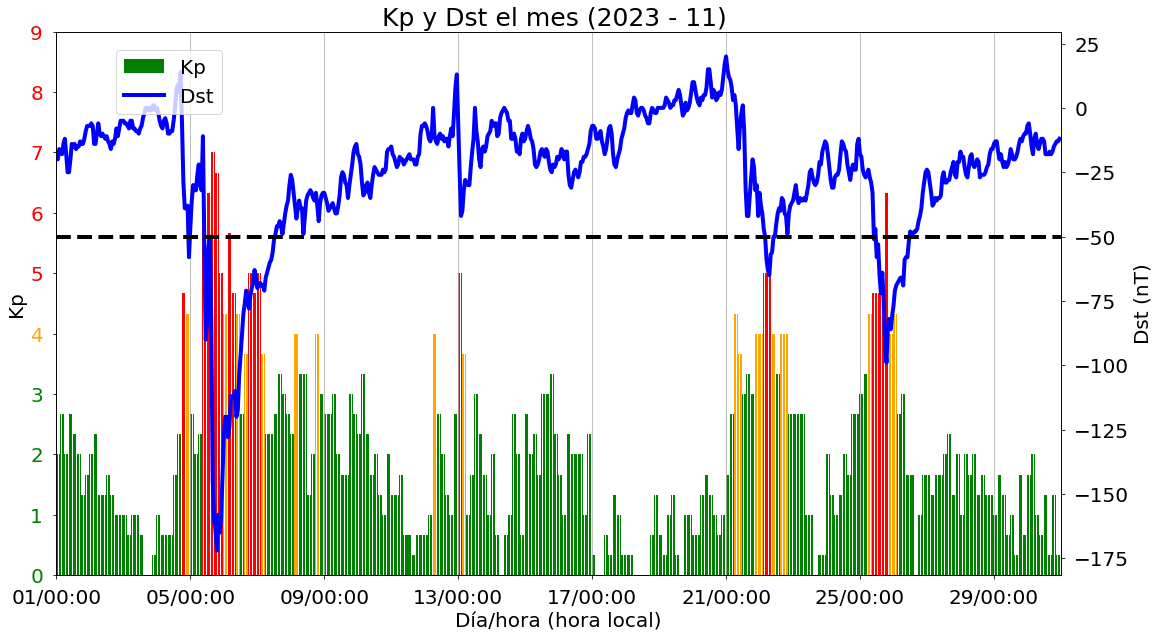

In [18]:
import matplotlib as mpl
day1 = 1
day2 = 30#20
str_i = '%d-%02d-%02d 00:00:00' % (year, month, day1)
str_f = '%d-%02d-%02d 23:59:00' % (year, month, day2)
dti = datetime.datetime.fromisoformat(str_i)
dtf = datetime.datetime.fromisoformat(str_f)
x_i = dti
x_f = dtf
fontsize=20
fig, ax1 = plt.subplots(1,1,figsize=(18,10))
dpi = 72
color = 'tab:green'
ax1.set_xlabel('Día/hora (hora local)', fontsize=fontsize)
ax1.set_ylabel('Kp',fontsize=fontsize)
clrs0 =  ['green' if kp < 35  else 'orange' if kp<45 else 'red' for kp in kp_series[str_i:str_f].values]
lsn1 = ax1.bar(kp_series[str_i:str_f].index,kp_series[str_i:str_f]/10,color=clrs0,width=0.03,label=r'Kp')
kp_labels = [0,1,2,3,4,5,6,7,8,9]#[0,10,20,30,40,50,60,70,80,90]
ax1.set_yticks(kp_labels)
ax1.set_ylim(0,9)
ax1.get_yticklabels()[0].set_color("green")
ax1.get_yticklabels()[1].set_color("green")
ax1.get_yticklabels()[2].set_color("green")
ax1.get_yticklabels()[3].set_color("green")
ax1.get_yticklabels()[4].set_color("orange")
ax1.get_yticklabels()[5].set_color("red")
ax1.get_yticklabels()[6].set_color("red")
ax1.get_yticklabels()[7].set_color("red")
ax1.get_yticklabels()[8].set_color("red")
ax1.get_yticklabels()[9].set_color("red")
myFmt = mdates.DateFormatter('%d/%H:%M')
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='y',labelsize=fontsize,pad=10)
ax1.tick_params(axis='x',labelsize=fontsize,pad=10)
ax1.set_xlim(x_i,x_f)
str_title = 'Kp y Dst del mes (%d - %02d) ' % (year,month)
ax1.set_title(str_title,fontsize=fontsize+5)
cmap = mpl.colors.ListedColormap(['green', 'yellow','red'])
bounds = [0, 4, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mappable = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(kp_series.values)   
ax1.grid(which='major', axis='y', linestyle='-')
ax1.grid()
ax2 = ax1.twinx()
ax2.plot(np.array(Dst_series[str_i:str_f].index),np.array(Dst_series[str_i:str_f]),color='blue',lw=4,label='Dst')
ax2.axhline(-50,linestyle='dashed',color='black',lw=4)
myFmt = mdates.DateFormatter('%d/%H:%M')
ax2.xaxis.set_major_formatter(myFmt)
ax2.tick_params(axis='y',labelsize=fontsize,pad=10)
ax2.tick_params(axis='x',labelsize=fontsize,pad=10)
ax2.set_ylabel('Dst (nT)',fontsize=fontsize)
fig.legend(fontsize=fontsize,loc=(0.1,0.82))

### Calculando el porcentaje del tiempo de actividad baja, moderada y alta (Kp y F10.7cm)

In [19]:
low_kp =  kp_series[kp_series<35]#np.where(kp_series <2.5,kp_series)#[kp if kp < 35 for kp in kp_series.values]
moderate_kp = kp_series.loc[(kp_series>35) & (kp_series<45)]
high_kp = kp_series[kp_series>=45]
print(low_kp.shape, high_kp.shape, moderate_kp.shape, kp_series.shape)
low_per = 100*low_kp.shape[0]/ kp_series.shape[0]
mod_per = 100*moderate_kp.shape[0]/ kp_series.shape[0]
high_per = 100*high_kp.shape[0]/ kp_series.shape[0]
print("Baja, moderada y alta:", low_per, mod_per, high_per)
mean_kp = kp_series.mean()
print("Kp promedio mensual: ", mean_kp)

(609,) (54,) (57,) (720,)
Baja, moderada y alta: 84.58333333333333 7.916666666666667 7.5
Kp promedio mensual:  20.430708333333335


In [20]:
low_F107 =  F107_series[F107_series<100]#np.where(kp_series <2.5,kp_series)#[kp if kp < 35 for kp in kp_series.values]
moderate_F107    = F107_series.loc[(F107_series>100) & (F107_series<150)]
high_F107 = F107_series[F107_series>=150]
print(low_kp.shape, high_kp.shape, moderate_kp.shape, kp_series.shape)
low_per = 100*low_F107.shape[0]/ F107_series.shape[0]
mod_per = 100*moderate_F107.shape[0]/ F107_series.shape[0]
high_per = 100*high_F107.shape[0]/ F107_series.shape[0]
print("Baja, moderada y alta:", low_per, mod_per, high_per)
mean_F107 = F107_series.mean()
print("F107 promedio mensual: ", mean_F107)

(609,) (54,) (57,) (720,)
Baja, moderada y alta: 0.0 46.666666666666664 53.333333333333336
F107 promedio mensual:  152.8033333333333


### Graficando para diferentes límites de F10.7 cm: 

/tmp/ipykernel_17700/800361888.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(f107_labels)


/home/jp/Desktop-ROJ/Plots-Boletines/2023/Noviembre/Figura3.pdf


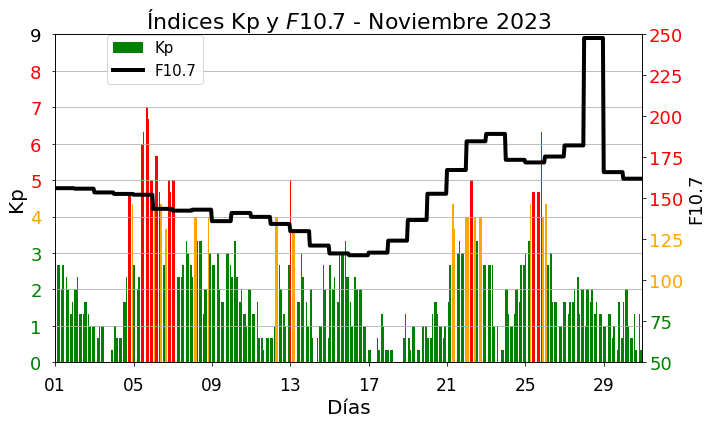

In [25]:
import matplotlib as mpl

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.image as image
fig, ax1 = plt.subplots(1,1,figsize=(10,6))
color = 'tab:green'
ax1.set_xlabel('Días', fontsize=20)
ax1.set_ylabel('Kp',fontsize=20)
clrs0 =  ['green' if kp < 35  else 'orange' if kp<45 else 'red' for kp in kp_series.values]
lns1 = ax1.bar(kp_series.index,kp_series/10,color=clrs0,width=0.03,label=r'Kp')#,markersize=imageSize[0]*(dpi/ 96))#.plot()
kp_labels = [0,1,2,3,4,5,6,7,8,9]#[0,10,20,30,40,50,60,70,80,90]
ax1.set_yticks(kp_labels)
myFmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='y',labelsize=18)
x_i = mdates.date2num(F107_series.index[0])
x_f = mdates.date2num(F107_series.index[-1])
ax1.set_xlim(x_i,x_f)
cmap = mpl.colors.ListedColormap(['green', 'yellow','red'])
bounds = [0, 4, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(kp_series.values)   # TODO: Or what???
ax1.grid(which='major', axis='y', linestyle='-')
ax1.get_yticklabels()[0].set_color("green")
ax1.get_yticklabels()[1].set_color("green")
ax1.get_yticklabels()[2].set_color("green")
ax1.get_yticklabels()[3].set_color("green")
ax1.get_yticklabels()[4].set_color("orange")
ax1.get_yticklabels()[5].set_color("red")
ax1.get_yticklabels()[6].set_color("red")
ax1.get_yticklabels()[7].set_color("red")
ax1.get_yticklabels()[8].set_color("red")
ax1.set_ylim(0,9)
ax1.tick_params(axis='y',labelsize=18,pad=10)
ax1.tick_params(axis='x',labelsize=17,pad=10)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('F10.7', fontsize=18)
lns2 = ax2.plot(F107_filtered,label='F10.7',color='black',lw=4)
f107_labels = [50,75,100,125,150,175,200,225,250]
ax2.set_ylim(50,250)
ax2.set_yticklabels(f107_labels)
ax2.get_yticklabels()[0].set_color("green")
ax2.get_yticklabels()[1].set_color("green")
ax2.get_yticklabels()[2].set_color("orange")
ax2.get_yticklabels()[3].set_color("orange")
ax2.get_yticklabels()[4].set_color("red")
ax2.get_yticklabels()[5].set_color("red")
ax2.get_yticklabels()[6].set_color("red")
ax2.get_yticklabels()[7].set_color("red")
ax2.get_yticklabels()[8].set_color("red")
ax2.tick_params(axis='y',labelsize=18)
ax2.tick_params(axis='x',labelsize=16)
ax2.xaxis.set_major_formatter(myFmt)
plt.title(r'Índices Kp y $F10.7$ - %s %d' % (str_month, year), fontsize=22)
ax2.set_ylim(50,250)
bounds = np.array([0,40,90])#[0, 4, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.legend(loc=(0.15,0.8))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.get_yticklabels()[8].set_color("red")
ax1.get_yticklabels()[8].set_color("red")
fig_name = plots_boletin + os.sep + 'Figura3.pdf'#"geomagnetic-activity-indices-%s-prima.png" % current_month
plt.savefig(fig_name)
print(fig_name)

/tmp/ipykernel_17700/2434675782.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(f107_labels)


/home/jp/Desktop-ROJ/Plots-Boletines/2023/Noviembre/Figura3.pdf


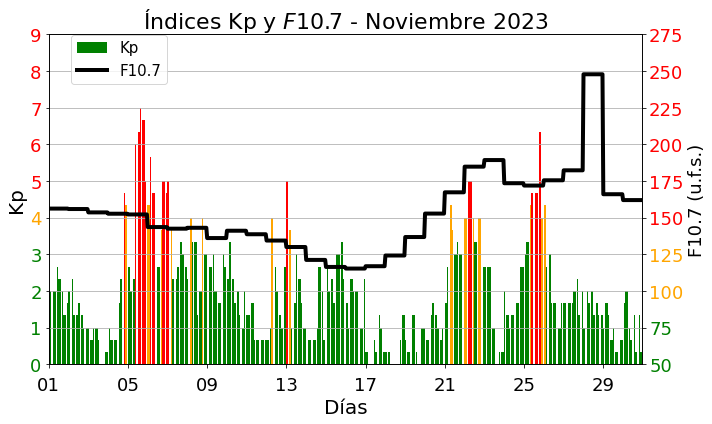

In [22]:
fig, ax1 = plt.subplots(1,1,figsize=(10,6))
dpi = 72
color = 'tab:green'
ax1.set_xlabel('Días', fontsize=20)
ax1.set_ylabel('Kp',fontsize=20)
clrs0 =  ['green' if kp < 35  else 'orange' if kp<45 else 'red' for kp in kp_series.values]
lsn1 = ax1.bar(kp_series.index,kp_series/10,color=clrs0,width=0.03,label=r'Kp')#,markersize=imageSize[0]*(dpi/ 96))#.plot()
kp_labels = [0,1,2,3,4,5,6,7,8,9]#[0,10,20,30,40,50,60,70,80,90]
ax1.set_yticks(kp_labels)
ax1.set_ylim(0,9)
ax1.get_yticklabels()[0].set_color("green")
ax1.get_yticklabels()[1].set_color("green")
ax1.get_yticklabels()[2].set_color("green")
ax1.get_yticklabels()[3].set_color("green")
ax1.get_yticklabels()[4].set_color("orange")
ax1.get_yticklabels()[5].set_color("red")
ax1.get_yticklabels()[6].set_color("red")
ax1.get_yticklabels()[7].set_color("red")
ax1.get_yticklabels()[8].set_color("red")
ax1.get_yticklabels()[9].set_color("red")
myFmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='y',labelsize=18)
ax1.tick_params(axis='x',labelsize=18,pad=8)
x_i = mdates.date2num(F107_series.index[0])
x_f = mdates.date2num(F107_series.index[-1])
ax1.set_xlim(x_i,x_f)
cmap = mpl.colors.ListedColormap(['green', 'yellow','red'])
bounds = [0, 4, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(kp_series.values)   # TODO: Or what???
ax1.grid(which='major', axis='y', linestyle='-')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('F10.7 (u.f.s.)', fontsize=18)
lsn2 = ax2.plot(F107_filtered,label='F10.7',color='black',lw=4)
f107_labels = [50,75,100,125,150,175,200,225,250,275]
ax2.set_ylim(50,275)
ax2.set_yticklabels(f107_labels)
ax2.get_yticklabels()[0].set_color("green")
ax2.get_yticklabels()[1].set_color("green")
ax2.get_yticklabels()[2].set_color("orange")
ax2.get_yticklabels()[3].set_color("orange")
ax2.get_yticklabels()[4].set_color("red")
ax2.get_yticklabels()[5].set_color("red")
ax2.get_yticklabels()[6].set_color("red")
ax2.get_yticklabels()[7].set_color("red")
ax2.get_yticklabels()[8].set_color("red")
ax2.get_yticklabels()[9].set_color("red")
ax2.tick_params(axis='y',labelsize=18)
ax2.xaxis.set_major_formatter(myFmt)
plt.title(r'Índices Kp y $F10.7$ - %s %d' % (str_month,year), fontsize=22)
bounds = np.array([0,40,90])#[0, 4, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.rc('legend',fontsize=15)
fig.legend(loc=(0.1,0.8))
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig_name_pdf = plots_boletin + os.sep + 'Figura3.pdf'#"geomagnetic-activity-indices-%s-prima.pdf" % current_month
fig_name_png = plots_boletin + os.sep + 'Figura3.png'
plt.savefig(fig_name_pdf)
plt.savefig(fig_name_png)
print(fig_name_pdf)

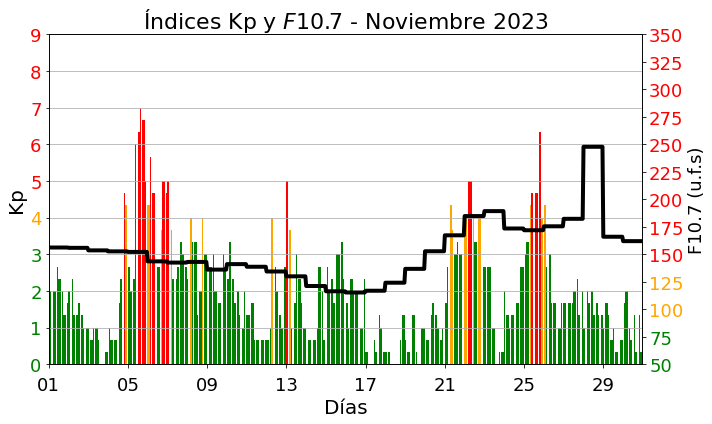

In [23]:
fig, ax1 = plt.subplots(1,1,figsize=(10,6))
dpi = 72
color = 'tab:green'
ax1.set_xlabel('Días', fontsize=20)
ax1.set_ylabel('Kp',fontsize=20)
clrs0 =  ['green' if kp < 35  else 'orange' if kp<45 else 'red' for kp in kp_series.values]
lsn1 = ax1.bar(kp_series.index,kp_series/10,color=clrs0,width=0.03,label=r'Kp')#,markersize=imageSize[0]*(dpi/ 96))#.plot()
kp_labels = [0,1,2,3,4,5,6,7,8,9]#[0,10,20,30,40,50,60,70,80,90]
ax1.set_yticks(kp_labels)
ax1.set_ylim(0,9)
ax1.get_yticklabels()[0].set_color("green")
ax1.get_yticklabels()[1].set_color("green")
ax1.get_yticklabels()[2].set_color("green")
ax1.get_yticklabels()[3].set_color("green")
ax1.get_yticklabels()[4].set_color("orange")
ax1.get_yticklabels()[5].set_color("red")
ax1.get_yticklabels()[6].set_color("red")
ax1.get_yticklabels()[7].set_color("red")
ax1.get_yticklabels()[8].set_color("red")
ax1.get_yticklabels()[9].set_color("red")
myFmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(myFmt)
ax1.tick_params(axis='y',labelsize=18)
ax1.tick_params(axis='x',labelsize=18,pad=8)
x_i = mdates.date2num(F107_series.index[0])
x_f = mdates.date2num(F107_series.index[-1])
ax1.set_xlim(x_i,x_f)
cmap = mpl.colors.ListedColormap(['green', 'yellow','red'])
bounds = [0, 4, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
mappable = cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(kp_series.values)   # TODO: Or what???
ax1.grid(which='major', axis='y', linestyle='-')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('F10.7 (u.f.s)', fontsize=18)#print(ax2.get_yticklabels())

lsn2 = ax2.plot(F107_filtered,label='F10.7',color='black',lw=4)
f107_labels = [50,75,100,125,150,175,200,225,250,275,300,325,350]
ax2.set_yticks(f107_labels,labels=f107_labels)
ax2.get_yticklabels()[0].set_color("green")
ax2.get_yticklabels()[1].set_color("green")
ax2.get_yticklabels()[2].set_color("orange")
ax2.get_yticklabels()[3].set_color("orange")
ax2.get_yticklabels()[4].set_color("red")
ax2.get_yticklabels()[5].set_color("red")
ax2.get_yticklabels()[6].set_color("red")
ax2.get_yticklabels()[7].set_color("red")
ax2.get_yticklabels()[8].set_color("red")
ax2.get_yticklabels()[9].set_color("red")
ax2.get_yticklabels()[10].set_color("red")
ax2.get_yticklabels()[11].set_color("red")
ax2.get_yticklabels()[12].set_color("red")
ax2.tick_params(axis='y',labelsize=18)
ax2.xaxis.set_major_formatter(myFmt)
plt.title(r'Índices Kp y $F10.7$ - %s %d' % (str_month,year), fontsize=22)
bounds = np.array([0,40,90])#[0, 4, 9]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
plt.rc('legend',fontsize=15)
#leg = lsn1 + lsn2 #+ ln3
#labs = [l.get_label() for l in leg]
#plt.setp(leg[0], linewidth=10)
#ax1.legend(leg, labs, loc='upper left')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig_name_pdf = plots_boletin + os.sep + 'Figura3.pdf'#"geomagnetic-activity-indices-%s-prima.pdf" % current_month